# What fraction of reads of each biotype in each tissue?

* get gene reads from rnaseq_qc_agg
* get total reads from rnaseqc/{SAMPLE_ID}.metrics.tsv - not sure which is right?

In [1]:
import pandas as pd
import json
import seaborn as sns
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
# Load in tissue colors 
with open('/home/klawren/oak/gtex/data/other_references/gtex_colors.json') as f:
    tissue_df = pd.DataFrame.from_dict(json.load(f), orient='index')
tissue_df = tissue_df.reset_index(names='tissue_name')
tissue_df['tissue_color_hex'] = '#' + tissue_df['tissue_color_hex']
tissue_color_palette = sns.color_palette(tissue_df['tissue_color_hex'])

# get the versions of tissue ids in file names
tissue_df['tissue_file_name'] = (
    tissue_df['tissue_name']
    .str.replace('(', '', regex=False)
    .str.replace(')', '', regex=False)
    .str.replace(' - ', '_')
    .str.replace(' ', '_')
)

gene_type_pal_highlight = {
    'new_lncRNA': '#fb83ba',
    'other_lncRNA': '#b70657',
    'protein_coding': '#215B30',
    'other_noncoding_RNA': '#6A5ACD',
    'pseudogene': '#005BBF',
    'artifact': 'grey'
}

In [3]:
# bring in gencode ids
gencode_ids = pd.read_csv('/home/klawren/oak/gtex/data/other_references/gencode/gencode_id_matching.txt', sep='\t', index_col=0)
gencode_ids['gene_type_grouped_highlight'] = np.where(gencode_ids['gene_type_grouped_highlight'] == 'CLS_lncRNA', 'new_lncRNA', gencode_ids['gene_type_grouped_highlight'])

# load in tissue-sample matching
sample_meta = pd.read_csv('/home/klawren/oak/gtex/data/other_references/v10/GTEx_Analysis_v10_Annotations_SampleAttributesDS.txt', sep='\t')
passed_samples = sample_meta[sample_meta['SMAFRZE']=='RNASEQ']
tissue_sample_lists = passed_samples.groupby('SMTSD').agg({'SAMPID':'unique'})

tissue_cutoff = 30
# only consider those with more that 30 samples

print(passed_samples.groupby('SMTSD').size()[passed_samples.groupby('SMTSD').size() < tissue_cutoff]) 
large_sample_size_tissues = passed_samples.groupby('SMTSD').size()[passed_samples.groupby('SMTSD').size() > tissue_cutoff].index
print('continuing with {} tissues'.format(len(large_sample_size_tissues)))

tissue_sample_lists = tissue_sample_lists[tissue_sample_lists.index.isin(large_sample_size_tissues)]
passed_samples = passed_samples[passed_samples['SMTSD'].isin(large_sample_size_tissues)]
tissue_color_df = tissue_df[tissue_df['tissue_name'].isin(large_sample_size_tissues)]
tissue_color_palette = sns.color_palette(tissue_color_df['tissue_color_hex'])

/local/scratch/klawren/slrmtmp.48860077/ipykernel_17711/1276678300.py:2: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  gencode_ids = pd.read_csv('/home/klawren/oak/gtex/data/other_references/gencode/gencode_id_matching.txt', sep='\t', index_col=0)


SMTSD
Cervix - Ectocervix                                      24
Cervix - Endocervix                                      23
Colon - Transverse - Mixed Cell                          10
Colon - Transverse - Mucosa                               8
Colon - Transverse - Muscularis                           9
Fallopian Tube                                           29
Kidney - Medulla                                         11
Liver - Hepatocyte                                        9
Liver - Mixed Cell                                        9
Liver - Portal Tract                                      2
Pancreas - Acini                                          9
Pancreas - Islets                                         3
Pancreas - Mixed Cell                                    10
Small Intestine - Terminal Ileum - Lymphoid Aggregate     9
Small Intestine - Terminal Ileum - Mixed Cell            10
Stomach - Mixed Cell                                     29
Stomach - Mucosa                  

/local/scratch/klawren/slrmtmp.48860077/ipykernel_17711/1276678300.py:6: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_meta = pd.read_csv('/home/klawren/oak/gtex/data/other_references/v10/GTEx_Analysis_v10_Annotations_SampleAttributesDS.txt', sep='\t')


In [4]:
gencode_ids[gencode_ids['in_v47_collapsed']&(~gencode_ids['in_v39_full'])]['gene_type_grouped_highlight'].value_counts()

gene_type_grouped_highlight
new_lncRNA        17975
protein_coding       47
pseudogene           28
sRNA                  3
Name: count, dtype: int64

In [5]:
gencode_ids[gencode_ids['in_v47_collapsed']&(~gencode_ids['in_v39_full'])&(gencode_ids['gene_type_grouped_highlight'] == 'protein_coding')]

,gene_id_v47,gene_id_v39,gene_type_grouped,gene_type_grouped_highlight,gene_type_v39,gene_type_v47,in_v47_full,in_v47_collapsed,in_v39_full,in_v39_collapsed,collapsed_location_change_v47,collapsed_location_change_v39,collapsed_location_change_between_versions,full_location_change_between_versions
gene_id_stable,,,,,,,,,,,,,,
ENSG00000288593,ENSG00000288593.1,NaN,protein_coding,protein_coding,NaN,protein_coding,True,True,False,False,True,False,True,True
ENSG00000289710,ENSG00000289710.1,NaN,protein_coding,protein_coding,NaN,protein_coding,True,True,False,False,False,False,True,True
ENSG00000289715,ENSG00000289715.1,NaN,protein_coding,protein_coding,NaN,protein_coding,True,True,False,False,True,False,True,True
ENSG00000289721,ENSG00000289721.1,NaN,protein_coding,protein_coding,NaN,protein_coding,True,True,False,False,True,False,True,True
ENSG00000289723,ENSG00000289723.1,NaN,protein_coding,protein_coding,NaN,TR_V_gene,True,True,False,False,False,False,True,True
ENSG00000289731,ENSG00000289731.3,NaN,protein_coding,protein_coding,NaN,protein_coding,True,True,False,False,False,False,True,True
ENSG00000289809,ENSG00000289809.2,NaN,protein_coding,protein_coding,NaN,protein_coding,True,True,False,False,False,False,True,True
ENSG00000290292,ENSG00000290292.10,NaN,protein_coding,protein_coding,NaN,protein_coding,True,True,False,False,False,False,True,True
ENSG00000290320,ENSG00000290320.1,NaN,protein_coding,protein_coding,NaN,protein_coding,True,True,False,False,True,False,True,True


get the v10 reads per gene in each tissue

In [6]:
# # takes ~8 minutes
# v10_gene_coutns = pd.read_csv('/home/klawren/oak/gtex/data/other_references/v10/GTEx_Analysis_v10_RNASeQCv2.4.2_gene_reads.gct.gz', skiprows=2, sep='\t')

# v10_tissue_type_counts = []
# for tissue_id, row in tqdm(tissue_sample_lists.iterrows()):
#     v10_gene_coutns[f'{tissue_id}.total_counts'] = v10_gene_coutns[row['SAMPID']].sum(axis=1)

# v10_tissue_gene_counts = v10_gene_coutns[['Name', *[f'{tissue_id}.total_counts' for tissue_id in tissue_sample_lists.index.values]]]
# v10_tissue_gene_counts.to_csv('/home/klawren/oak/gtex/data/other_references/v10/GTEx_Analysis_v10_tissue_gene_reads.txt', sep='\t', index=None)

v10_tissue_gene_counts = pd.read_csv('/home/klawren/oak/gtex/data/other_references/v10/GTEx_Analysis_v10_tissue_gene_reads.txt', sep='\t')

get the v11 reads per gene in each tissue

In [7]:
# count the number of reads in each tissue for each gene
rnaseqc_dir = '/home/klawren/oak/gtex/output/all_tissues_old'
# tissue_type_counts = []
# for tissue_id in tqdm(tissue_sample_lists.index.values, total=len(tissue_sample_lists)):
#     print(tissue_id)
#     tissue_id_clean = tissue_id.replace(' - ', '_').replace('-', '_').replace(' ', '_').replace('(', '').replace(')', '')
#     tissue_agg = pd.read_csv(f'{rnaseqc_dir}/rnaseqc_agg/{tissue_id_clean}.v11.gene_reads.gct.gz', sep='\t')
#     tissue_agg[f'{tissue_id}.total_counts'] = tissue_agg[tissue_agg.columns[2:]].sum(axis=1)
#     tissue_type_counts.append(tissue_agg[['Name', f'{tissue_id}.total_counts']])

# # concatenate the tissues
# v11_tissue_gene_counts = tissue_type_counts[0].reset_index()
# for idx in range(len(tissue_type_counts)-1):
#     v11_tissue_gene_counts = pd.merge(v11_tissue_gene_counts, tissue_type_counts[idx+1], on=['Name'])
# v11_tissue_gene_counts = v11_tissue_gene_counts.drop(columns=['index'])

# v11_tissue_gene_counts.to_csv(f'{rnaseqc_dir}/rnaseqc_agg/GTEx_Analysis_v11_tissue_gene_reads.txt', sep='\t', index=None)
v11_tissue_gene_counts = pd.read_csv(f'{rnaseqc_dir}/rnaseqc_agg/GTEx_Analysis_v11_tissue_gene_reads.txt', sep='\t')


In [8]:
tissue_gene_counts = pd.merge(v11_tissue_gene_counts, gencode_ids, left_on='Name', right_on='gene_id_v47', how='right', suffixes=['_v11', ''])
tissue_gene_counts = pd.merge(v10_tissue_gene_counts, tissue_gene_counts, left_on='Name', right_on='gene_id_v39', how='right', suffixes=['_v10', '_v11'])

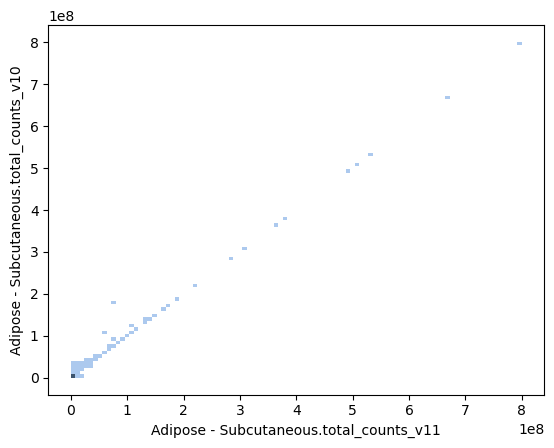

In [9]:
ax = sns.histplot(tissue_gene_counts, x='Adipose - Subcutaneous.total_counts_v11', y='Adipose - Subcutaneous.total_counts_v10', bins=100)


show how the new reference has reads that map to the new exons (genes in v47 not in v39)
show also that some reads decrease becuase of ambiguous mapping (genes in v39 not in v47)

In [10]:
# get the total number of reads in each sample
# rnaseqc_dir = '/home/klawren/oak/gtex/output/all_tissues'
# sample_total_reads = pd.DataFrame(tissue_sample_lists.explode('SAMPID')).reset_index().set_index('SAMPID')



# for sample_id, row in tqdm(sample_total_reads.iterrows(), total=len(sample_total_reads)):
#     sample_metrics = pd.read_csv(f'{rnaseqc_dir}/rnaseq_qc/{sample_id}.metrics.tsv', sep='\t').set_index('Sample')
#     # the reads in the gene_counts.tpm are from high quality, exonic reads (multiply rate by total)
#     sample_total_reads.loc[sample_id, 'total_reads']  = sample_metrics.loc['High Quality Reads'].iloc[0]
#     sample_total_reads.loc[sample_id, 'exon_rate']  = sample_metrics.loc['High Quality Exonic Rate'].iloc[0]
#     sample_total_reads.loc[sample_id, 'total_exon_reads'] = sample_metrics.loc['High Quality Reads'].iloc[0] * sample_metrics.loc['High Quality Exonic Rate'].iloc[0]

# sample_total_reads.to_csv(f"{rnaseqc_dir}/rnaseqc_agg/sample_total_reads.txt", sep='\t')

sample_total_reads = pd.read_csv(f"{rnaseqc_dir}/rnaseqc_agg/sample_total_reads.txt", sep='\t')

# group reads over samples in the same tissue
tissue_total_reads = []
for idx, row in tissue_sample_lists.iterrows():
    tissue_total_reads.append(sample_total_reads[sample_total_reads['SAMPID'].isin(row['SAMPID'])]['total_reads'].sum())

tissue_total_reads = pd.DataFrame(tissue_total_reads, index=tissue_sample_lists.index, columns=['total_reads'])
tissue_total_reads.reset_index(inplace=True)
tissue_total_reads.rename(columns={'SMTSD': 'tissue_id'}, inplace=True)

In [11]:
tissue_total_reads['total_rnaseqc_reads_v10'] = tissue_gene_counts[[f'{tissue_id}.total_counts_v10' for tissue_id in tissue_sample_lists.index.values]].sum().values
tissue_total_reads['fraction_rnaseq_v10'] = tissue_total_reads['total_rnaseqc_reads_v10']/tissue_total_reads['total_reads']*100

tissue_total_reads['total_rnaseqc_reads_v11'] = tissue_gene_counts[[f'{tissue_id}.total_counts_v11' for tissue_id in tissue_sample_lists.index.values]].sum().values
tissue_total_reads['fraction_rnaseq_v11'] = tissue_total_reads['total_rnaseqc_reads_v11']/tissue_total_reads['total_reads']*100

tissue_total_reads['v47_rnaseqc_reads']  = tissue_gene_counts[tissue_gene_counts['in_v47_collapsed']&(~tissue_gene_counts['in_v39_full'])][[f'{tissue_id}.total_counts_v11' for tissue_id in tissue_sample_lists.index.values]].sum().values
tissue_total_reads['fraction_v47_reads'] = tissue_total_reads['v47_rnaseqc_reads']/tissue_total_reads['total_reads']*100

for gene_type in gencode_ids.gene_type_grouped_highlight.unique():
    tissue_total_reads[f'{gene_type}_v11_reads']  = tissue_gene_counts[(tissue_gene_counts['gene_type_grouped_highlight'] == gene_type)][[f'{tissue_id}.total_counts_v11' for tissue_id in tissue_sample_lists.index.values]].sum().values
    tissue_total_reads[f'fraction_{gene_type}_v11'] = tissue_total_reads[f'{gene_type}_v11_reads']/tissue_total_reads['total_reads']*100
 
    tissue_total_reads[f'{gene_type}_v10_reads']  = tissue_gene_counts[(tissue_gene_counts['gene_type_grouped_highlight'] == gene_type)][[f'{tissue_id}.total_counts_v10' for tissue_id in tissue_sample_lists.index.values]].sum().values
    tissue_total_reads[f'fraction_{gene_type}_v10'] = tissue_total_reads[f'{gene_type}_v10_reads']/tissue_total_reads['total_reads']*100

<Axes: xlabel='fraction_rnaseq_v10', ylabel='clarified_read_fraction'>

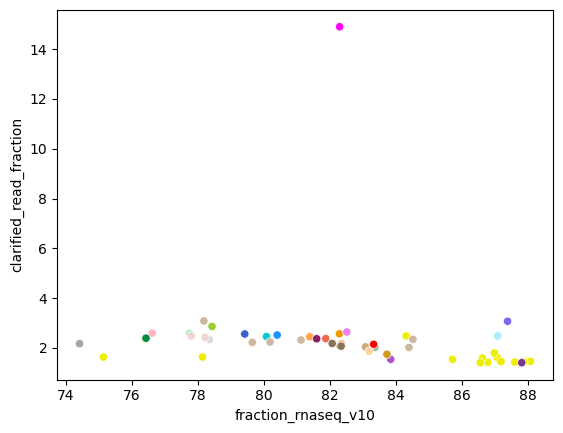

In [12]:
tissue_total_reads['clarified_read_fraction'] =  (tissue_total_reads['total_rnaseqc_reads_v10'] - tissue_total_reads['total_rnaseqc_reads_v11'] + tissue_total_reads['v47_rnaseqc_reads'])/tissue_total_reads['total_rnaseqc_reads_v10']*100
sns.scatterplot(tissue_total_reads, x='fraction_rnaseq_v10', y='clarified_read_fraction', hue='tissue_id', palette=tissue_color_palette, legend=None)

In [18]:
tissue_total_reads.columns

Index(['tissue_id', 'total_reads', 'total_rnaseqc_reads_v10',
       'fraction_rnaseq_v10', 'total_rnaseqc_reads_v11', 'fraction_rnaseq_v11',
       'v47_rnaseqc_reads', 'fraction_v47_reads', 'protein_coding_v11_reads',
       'fraction_protein_coding_v11', 'protein_coding_v10_reads',
       'fraction_protein_coding_v10', 'pseudogene_v11_reads',
       'fraction_pseudogene_v11', 'pseudogene_v10_reads',
       'fraction_pseudogene_v10', 'existing_lncRNA_v11_reads',
       'fraction_existing_lncRNA_v11', 'existing_lncRNA_v10_reads',
       'fraction_existing_lncRNA_v10', 'sRNA_v11_reads', 'fraction_sRNA_v11',
       'sRNA_v10_reads', 'fraction_sRNA_v10', 'artifact_v11_reads',
       'fraction_artifact_v11', 'artifact_v10_reads', 'fraction_artifact_v10',
       'new_lncRNA_v11_reads', 'fraction_new_lncRNA_v11',
       'new_lncRNA_v10_reads', 'fraction_new_lncRNA_v10',
       'clarified_read_fraction'],
      dtype='object')

In [19]:
gene_type_columns = [
    'fraction_protein_coding_v11',
    'fraction_sRNA_v11',
    'fraction_pseudogene_v11',
    'fraction_existing_lncRNA_v11',
    'fraction_new_lncRNA_v11']

tissue_fraction_melt = tissue_total_reads.melt(value_vars=gene_type_columns, 
    id_vars=['tissue_id'],
    var_name='gene_type', 
    value_name='fraction_counts')

In [20]:
tissue_fraction_melt[tissue_fraction_melt['gene_type'] == 'fraction_new_lncRNA_v11']['fraction_counts'].mean()

np.float64(0.26077005454134916)

In [21]:
tissue_fraction_melt[tissue_fraction_melt['gene_type'] == 'fraction_new_lncRNA_v11'].sort_values('fraction_counts', ascending=False)

,tissue_id,gene_type,fraction_counts
245,Testis,fraction_new_lncRNA_v11,0.954540
211,Brain - Cerebellum,fraction_new_lncRNA_v11,0.405375
238,Pituitary,fraction_new_lncRNA_v11,0.398039
210,Brain - Cerebellar Hemisphere,fraction_new_lncRNA_v11,0.388038
239,Prostate,fraction_new_lncRNA_v11,0.371564
243,Spleen,fraction_new_lncRNA_v11,0.360896
246,Thyroid,fraction_new_lncRNA_v11,0.354473
236,Ovary,fraction_new_lncRNA_v11,0.332100
235,Nerve - Tibial,fraction_new_lncRNA_v11,0.310344
247,Uterus,fraction_new_lncRNA_v11,0.305925


/home/klawren/.pixi/envs/python/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/klawren/.pixi/envs/python/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 52.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/klawren/.pixi/envs/python/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 86.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/klawren/.pixi/envs/python/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 82.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/local/scratch/klawren/slrmtmp.4

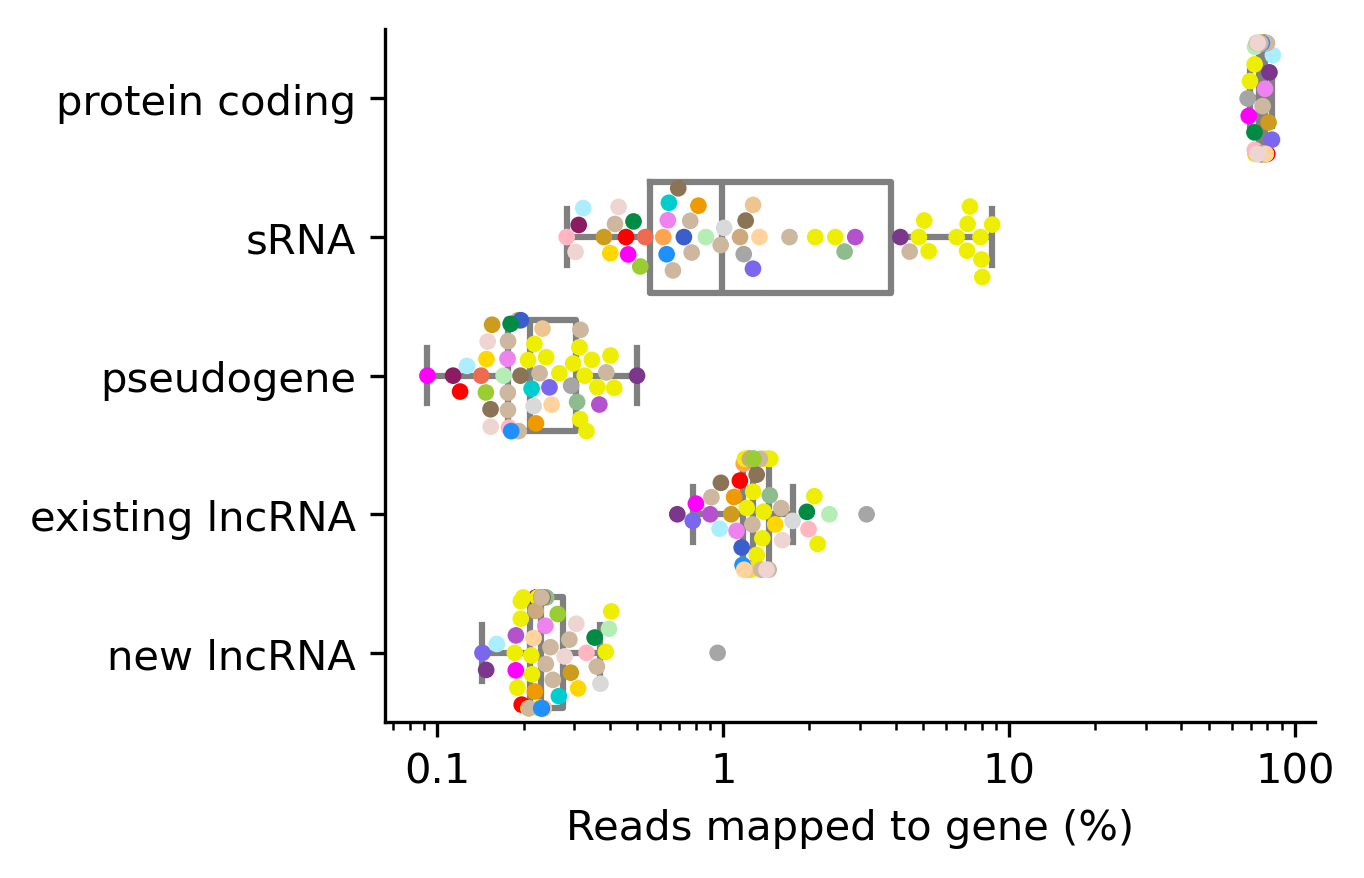

In [22]:
fig, ax = plt.subplots(figsize=(4,3), dpi=300)
sns.boxplot(tissue_fraction_melt, x='fraction_counts', y='gene_type', legend=None, color='grey', fill=False, fliersize=0, ax=ax)
sns.swarmplot(tissue_fraction_melt, hue='tissue_id', x='fraction_counts', y='gene_type', palette=tissue_color_palette, s=4, legend=None, ax=ax)

ax.spines[['top', 'right']].set_visible(False)
ax.set_xticks([-4, -2, 0], labels=['$10^{-4}$', '$10^{-2}$', '1'])
ax.set_xlabel('Reads mapped to gene (%)')
ax.set_xscale('log')
ax.set_ylabel('')
ax.set_yticklabels(['protein coding', 'sRNA', 'pseudogene', 'existing lncRNA', 'new lncRNA'])
ax.set_xticklabels([.001, .01, .1, 1, 10, 100])
plt.show()